In [51]:
import pandas_datareader.data as pdr
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import math

In [52]:
start = '2021-02-01'
end = '2022-02-01'
ticker = 'NFLX'

In [53]:
dataNetflix = pdr.get_data_yahoo(ticker, start, end)

In [54]:
dataNetflix.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-01,545.059998,531.729980,536.789978,539.039978,3547500,539.039978
2021-02-02,555.479980,538.929993,542.010010,548.159973,3767600,548.159973
2021-02-03,550.479980,538.239990,550.169983,539.450012,3172300,539.450012
2021-02-04,559.479980,537.510010,539.809998,552.159973,5164500,552.159973
2021-02-05,554.440002,545.479980,552.260010,550.789978,2376200,550.789978


<IPython.core.display.Javascript object>


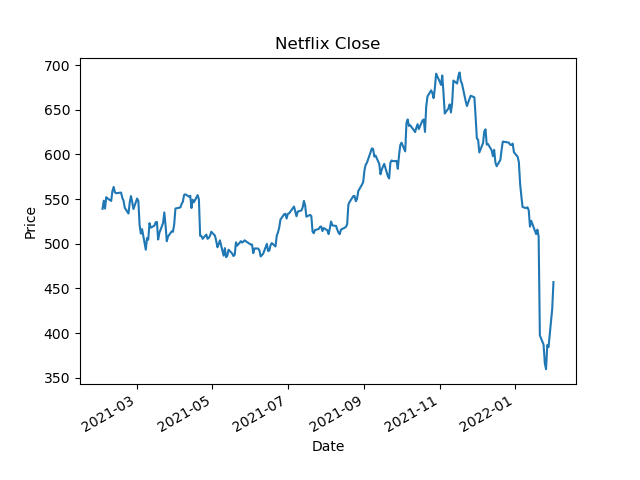

Text(0.5, 1.0, 'Netflix Close')

In [55]:
fig, ax = plt.subplots()
dataNetflix['Close'].plot(ax=ax)
ax.set_ylabel("Price")
ax.set_title("Netflix Close")


This is the start of the tutorial on advanced calculations. Using the CSV

In [60]:
data = pd.read_csv("./data/NFLX.csv", index_col=0, parse_dates=True)

In [61]:
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-11,564.440002,565.929993,554.219971,557.590027,557.590027,2730600
2021-02-12,556.940002,561.250000,550.849976,556.520020,556.520020,2197100
2021-02-16,557.289978,563.630005,552.729980,557.280029,557.280029,2624100
2021-02-17,550.989990,555.250000,543.030029,551.340027,551.340027,2069600
2021-02-18,549.000000,550.000000,538.229980,548.219971,548.219971,2456200


In [62]:
#add a column using the pct_change() method
data['%-chg'] = data['Close'].pct_change()

In [63]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg
Date,,,,,,,
2021-02-11,564.440002,565.929993,554.219971,557.590027,557.590027,2730600,NaN
2021-02-12,556.940002,561.250000,550.849976,556.520020,556.520020,2197100,-0.001919
2021-02-16,557.289978,563.630005,552.729980,557.280029,557.280029,2624100,0.001366
2021-02-17,550.989990,555.250000,543.030029,551.340027,551.340027,2069600,-0.010659
2021-02-18,549.000000,550.000000,538.229980,548.219971,548.219971,2456200,-0.005659


In [64]:
#calulate the standard deviation
# first we need the log function 
#shift()--- shifts the values down one row

In [65]:
data['log_returns'] = np.log(data['Close']/data['Close'].shift())

In [66]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,log_returns
Date,,,,,,,,
2021-02-11,564.440002,565.929993,554.219971,557.590027,557.590027,2730600,NaN,NaN
2021-02-12,556.940002,561.250000,550.849976,556.520020,556.520020,2197100,-0.001919,-0.001921
2021-02-16,557.289978,563.630005,552.729980,557.280029,557.280029,2624100,0.001366,0.001365
2021-02-17,550.989990,555.250000,543.030029,551.340027,551.340027,2069600,-0.010659,-0.010716
2021-02-18,549.000000,550.000000,538.229980,548.219971,548.219971,2456200,-0.005659,-0.005675


In [83]:
#daily std
daily_std_close_price = data['log_returns'].std()

In [84]:
daily_std_close_price

0.025243178758772192

In [87]:
#annual std is the volatility
volatility_close_price = daily_std_close_price * math.sqrt(252)

In [88]:
volatility_close_price

0.4007230397787561

In [91]:
str_volatility = str(round(volatility_close_price, 4)*100)

In [92]:
str_volatility

'40.07'

<IPython.core.display.Javascript object>


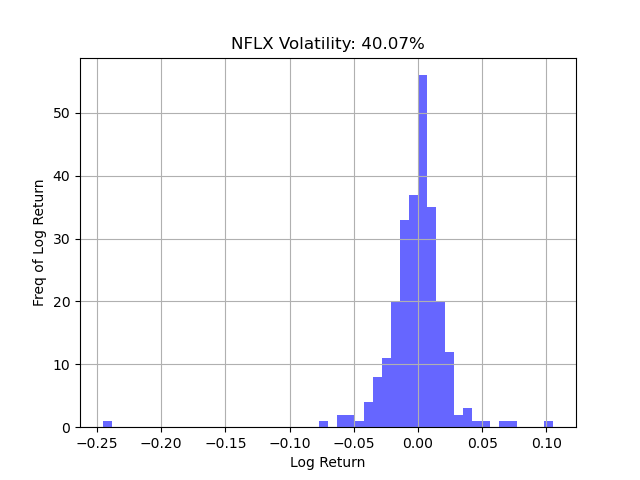

Text(0.5, 1.0, 'NFLX Volatility: 40.07%')

In [99]:
fig, ax = plt.subplots()
data['log_returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log Return")
ax.set_ylabel("Freq of Log Return")
ax.set_title("NFLX Volatility: " + str_volatility + "%")

Moving avg: average of the last n days
Use the rolling(n) function where n is the days you want
IF rolling average is lower than the closing price, you have an upward trend in price

For MA, 50 and 200 are common

In [108]:
data['Close'].rolling(2).sum()

Date
2021-02-11            NaN
2021-02-12    1114.110047
2021-02-16    1113.800049
2021-02-17    1108.620056
2021-02-18    1099.559998
                 ...     
2022-02-07     812.270019
2022-02-08     805.630005
2022-02-09     816.420014
2022-02-10     819.160004
2022-02-11     804.789978
Name: Close, Length: 254, dtype: float64

In [114]:
data['MA10'] = data['Close'].rolling(10).mean()

In [115]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,log_returns,MA10
Date,,,,,,,,,
2022-02-07,410.170013,412.350006,393.549988,402.100006,402.100006,8232900,-0.019675,-0.019871,402.880008
2022-02-08,398.179993,406.609985,395.829987,403.529999,403.529999,6818500,0.003556,0.003550,406.591006
2022-02-09,408.649994,412.980011,398.790009,412.890015,412.890015,7738200,0.023195,0.022930,411.910007
2022-02-10,402.100006,408.000000,396.359985,406.269989,406.269989,8445400,-0.016033,-0.016163,413.867004
2022-02-11,405.329987,411.610291,395.600098,398.519989,398.519989,2774538,-0.019076,-0.019260,415.283005


Exponential Moving Average
Use the ewm() function
This is more reactive---it puts more weight on the most recent values

In [118]:
data['EMA10'] = data['Close'].ewm(span=10, adjust=False).mean()

In [119]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,log_returns,MA10,EMA10
Date,,,,,,,,,,
2022-02-07,410.170013,412.350006,393.549988,402.100006,402.100006,8232900,-0.019675,-0.019871,402.880008,419.562569
2022-02-08,398.179993,406.609985,395.829987,403.529999,403.529999,6818500,0.003556,0.003550,406.591006,416.647556
2022-02-09,408.649994,412.980011,398.790009,412.890015,412.890015,7738200,0.023195,0.022930,411.910007,415.964367
2022-02-10,402.100006,408.000000,396.359985,406.269989,406.269989,8445400,-0.016033,-0.016163,413.867004,414.201753
2022-02-11,405.329987,411.610291,395.600098,398.519989,398.519989,2774538,-0.019076,-0.019260,415.283005,411.350523


<IPython.core.display.Javascript object>


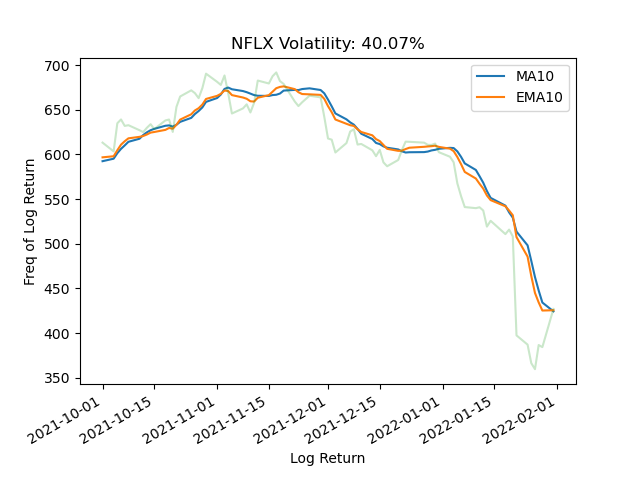

Text(0.5, 1.0, 'NFLX Volatility: 40.07%')

In [136]:
fig, ax = plt.subplots()
data[['MA10','EMA10']].loc['2021-10-1':'2022-01-31'].plot(ax=ax)
data['Close'].loc['2021-10-1':'2022-01-31'].plot(ax=ax, alpha=0.25)
ax.set_xlabel("Log Return")
ax.set_ylabel("Freq of Log Return")
ax.set_title("NFLX Volatility: " + str_volatility + "%")
